### Fullname: Võ Thanh Hiệp
### Student ID: 21127275

# Thuật toán

Mọi mô hình trong đồ án này đều sử dụng mô hình OLS để tính hồi quy. Cụ thể hơn, các bước để xử lý bài toán được trình bày như sau:
- **Bước 1:** Đọc dữ liệu từ file *wine.csv* sau đó có thể sử dụng lớp DataFrame trong thư viện Pandas để có thể dễ dàng xử lí trong việc đọc cũng như tách các đặc trưng.
- **Bước 2:** Tách đặc trưng *quality* trong các đặc điểm của rượu ra làm vector **Y** còn các đặc trưng còn lại sẽ tạo thành ma trận **X**, ngoài ra ta cũng cần phải thêm một cột chỉ chứa toàn số 1 vào cột đầu tiên trong ma trận **X**.
- **Bước 3:** Đối với yêu cầu đầu tiên, ta mô hình hóa các đặc trưng thành dạng $Y = \theta_0 + \theta_1X_1 + \theta_2X_2 + ... + + \theta_{11}X_{11} = \theta ^ TX$.
- **Bước 4:** Sau đó, ta tìm vector $\theta$ bằng công thức: $\theta = (X^TX)^{-1}X^TY$
- **Bước 5:** Cuối cùng để đánh giá xem mô hình đã xây dựng từ các bước làm trước hiệu quả hay không ta sử dụng sai số **r** tính bằng cách lấy $r = ||\theta^TX - Y||$
- **Bước 6:** Đối với yêu cầu thứ hai trong đồ án, ta có thể tìm 1 đặc trưng phù hợp thông qua nhiều cách, tuy nhiên, ta sẽ sử dụng phương pháp *Leave-one-out Cross Validation* để có thể dễ dàng xác định được đặc trưng ta có thể chọn cho mô hình đối với yêu cầu này. Phương pháp có thể trình bày như sau lấy từng đặc trưng một trong X rồi mô hình lại thành dạng hồi quy tuyến tính $Y = \theta_0 + \theta_1X$ để khớp dữ liệu sau đó ta tìm sai số với mỗi một đặc trưng. Cuối cùng, ta chỉ cần lấy ra mô hình nào sử dụng đặc trưng cho ra giá trị sai số r nhỏ nhất.
- **Bước 7:** Đối với yêu cầu cuối cùng trong đồ án, ta đầu tiên xem xét xem sự tương quan của các đặc trưng với nhau thông qua hệ số Pearson. Đối với mẫu dữ liệu trong đồ án này ta có thể thấy rằng độ tương quang cao nhất là **-0.68** giữa đặc trưng *fixed acidity* và *pH* tuy nhiên giá trị của hệ số tương quang này còn thực sự không quá cao nên khi bỏ thử một trong hai đặc trưng này ta có thể thấy độ sai số r đối với mô hình đấy sẽ tăng lên, nên ta vẫn giữ 11 đặc trưng này lại để tìm mô hình khác. Trong yêu cầu này, ta sẽ sử dụng mô hình tuyến tính bậc 2 để hồi quy. Cụ thể, mô hình sẽ có dạng $Y = \theta ^ T(X | X^2 | X_iX_j | X_iX_j^2)$ với dấu $|$ biểu diễn cho việc ghép các ma trận theo cột liên tiếp. Với việc sử dụng mô hình trên ta có thể thấy được từ mô hình tuyến tình ban đầu sử dụng 11 đặc trưng có sai số là **22.0947** thì sai số mô hình đề xuất trên sẽ có sai số là **19.1365**.

# Các bài đã hoàn thành:
- Câu a (Problem a)
- Câu b (Problem b)
- Câu c (Problem c)

In [1]:
import pandas as pd
df = pd.read_csv('wine.csv', delimiter=';')

In [2]:
# duplicating a vector
def copyVector(vector):
    result = []
    for i in range(len(vector)):
        result.append(vector[i])
    return result

# duplicating a matrix
def copyMatrix(Matrix):
    result = []
    nRow = len(Matrix)
    nColumn = len(Matrix[0])
    
    for i in range(nRow):
        row = []
        for j in range(nColumn):
            row.append(Matrix[i][j])
        result.append(row)
            
    return result

# print the matrix
def printMatrix(Matrix):
    nRow = len(Matrix)
    print('[', end="")
    for i in range(nRow - 1):
        print(Matrix[i])
    print(Matrix[nRow - 1], end="")
    print(']')
    
# subtract 2 vectors
def subtractTwoVectors(vector1, vector2):
    Res_Vector = []
    if len(vector1) != len(vector2):
        print("Cannot add two vectors with different lengths")
        return
    
    length = len(vector1)
    for i in range(length):
        Res_Vector.append(vector1[i] - vector2[i])
        
    return Res_Vector

# calculating the norm of vector
def norm(vector):
    result = 0
    for i in range(len(vector)):
        result += vector[i]**2
    
    return result**(1/2)

In [3]:
# checking whether 2 matrix can multiple with each other
def isValidToMultiple(A, B):
    columnA = len(A[0])
    rowB = len(B)
    
    if columnA == rowB:
        return True
    return False

# calculating dot product of 2 vectors
def dotProduct(fVector, sVector):
    if len(fVector) != len(sVector):
        return "Cannot dot"
    
    result = 0
    for i in range(len(fVector)):
        result += fVector[i] * sVector[i]
        
    return result

# getting the column from a matrix in a particular position
def getColumn(Matrix, pColumn):
    if type(Matrix[0]) is not list:
        return Matrix[pColumn]
    
    nCol = len(Matrix[0])
    if pColumn > nCol:
        return 'Invalid! Column position is not exists'
    
    row = len(Matrix)
    result = []
    for i in range(row):
        result.append(Matrix[i][pColumn])
        
    return result

# multipling 2 matrixs
def multiple2Matrixs(A, B):
    if isValidToMultiple(A, B) == False:
        return 'Invalid! Cannot multiple'
    
    result = []
    row = len(A)
    column = len(B[0]) if type(B[0]) is list else len(B)
    
    for i in range(row):
        line = []
        for j in range(column):
            columnB = getColumn(B, j)
            line.append(dotProduct(A[i], columnB))
        result.append(line)
        
    return result

In [4]:
# transposing the matrix
def transposeMatrix(matrix):
    if type(matrix[0]) is not list:
        transpose_matrix = []
        for i in range(len(matrix)):
            transpose_matrix.append([matrix[i]])
        return transpose_matrix
    
    nRow = len(matrix)
    nCol = len(matrix[0])
    transpose_matrix = []
    
    if nCol == 1:
        for i in range(nRow):
            transpose_matrix.append(matrix[i][0])
        return transpose_matrix
    
    for i in range(nCol):
        line = []
        for j in range(nRow):
            line.append(matrix[j][i])
        transpose_matrix.append(line)
            
    return transpose_matrix

In [5]:
"""
When the lead element is found out. Of course, it values will be 1. In the column includes this cell, 
make all cells above and below it to 0.
"""
def clearColumnIncludeLeadElement(Matrix, cellRow, cellColumn, nRow, nColumn):
    for i in range(cellRow + 1, nRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
    
    for i in range(cellRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
            
# Using for inverse fomulation
def clearColumnOf2MatrixsIncludeLeadElement(Matrix, Augmented_Inverse, cellRow, cellColumn, nRow, nColumn):
    for i in range(cellRow + 1, nRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
        for j in range(nColumn):
            Augmented_Inverse[i][j] -= rate * Augmented_Inverse[cellRow][j]
    
    for i in range(cellRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
        for j in range(nColumn):
            Augmented_Inverse[i][j] -= rate * Augmented_Inverse[cellRow][j]

# Reducing all values in row by dividing them by the lead element in that row.
def divideRowWithANumber(Row, dividend, n):
    for i in range(n):
        Row[i] /=  dividend

# If the cell at A[cellRow][cellColumn] = 0. Finding the cell below it that different from value 0.
def findLeadPositionBelowCellInColumn(Matrix, cellRow, cellColumn, nRow):
    for i in range(cellRow + 1, nRow):
        if Matrix[i][cellColumn] != 0:
            return i
    return nRow

# checking whether the Matrix is invertible
def checkIfTheMatrixHasInverse(Matrix, nRow, nColumn):
    if nRow < nColumn:
        return False
    
    for i in range(nColumn):
        if Matrix[i][i] != 1:
            return False
        
    for i in range(nColumn):
        for j in range(nColumn):
            if i == j:
                continue
            if Matrix[i][j] != 0:
                return False
            
    for i in range(nColumn, nRow):
        for j in range(nColumn):
            if Matrix[i][j] != 0:
                return False
            
    return True

# calculating inverse matrix
def inverse(A):
    Matrix = copyMatrix(A)
    nRow = len(Matrix)
    nColumn = len(Matrix[0])
    
    result_Matrix = []
    for i in range(nRow):
        result_Matrix.append([0] * nColumn)
        
    for i in range(nRow):
        result_Matrix[i][i] = 1
    
    j = 0
    for i in range(nColumn):
        if Matrix[j][i] == 0:
            rowSwitch = findLeadPositionBelowCellInColumn(Matrix, j, i, nRow)
            if rowSwitch == nRow:
                continue
            Matrix[j], Matrix[rowSwitch] = Matrix[rowSwitch], Matrix[j]
            result_Matrix[j], result_Matrix[rowSwitch] = result_Matrix[rowSwitch], result_Matrix[j]
        
        leadElement = Matrix[j][i]
        divideRowWithANumber(Matrix[j], leadElement, nColumn)
        divideRowWithANumber(result_Matrix[j], leadElement, nColumn)
        clearColumnOf2MatrixsIncludeLeadElement(Matrix, result_Matrix, j, i, nRow, nColumn)
        
        j += 1
        if j == nRow:
            break
            
    if checkIfTheMatrixHasInverse(Matrix, nRow, nColumn) == False:
        return 'Ma trận không khả nghịch'
    
    return result_Matrix

In [6]:
# creating the matrix A with a column 1 in the first
def getA(xs):
    A = []
    if type(xs[0]) is not list:
        for i in range(len(xs)):
            A.append([1, xs[i]])
        return A
    
    for i in range(len(xs)):
        line = [1]
        for j in range(len(xs[0])):
            line.append(xs[i][j])
        A.append(line)
        
    return A

In [7]:
# calculating the Ordinary Least Square
def OLS(A, y):
    transposeA = transposeMatrix(A)
    
    result = multiple2Matrixs(transposeA, A)
    result = inverse(result)
    result = multiple2Matrixs(result, transposeA)
    result = multiple2Matrixs(result, y)
    
    return result

In [8]:
# calculating the Root Mean Square Deviation
def calculateRMSE(A, x, y):
    result = multiple2Matrixs(A, x)
    result = transposeMatrix(result)
    
    y = transposeMatrix(y)
    
    result = subtractTwoVectors(result, y)
    return norm(result)

### Problem a

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5,6
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8,6


In [10]:
feature_names = df.columns.tolist()

xs = df.drop(columns=['quality']).values.tolist() # get the matrix of all features by column
y = df.quality.values.tolist() # get the label
y = transposeMatrix(y) # covert the label y to column

A = getA(xs) # add the column one in the left front

theta = OLS(A, y)
printMatrix(theta)

RMSE = calculateRMSE(A, theta, y)
print()
print("The RMSE:", RMSE)

[[42.917162276626996]
[0.047524752878432]
[-1.0687425805436819]
[-0.2687108285058785]
[0.03497426610080183]
[-1.597295604940065]
[0.003487881377091483]
[-0.0037983550575348057]
[-39.4690808552086]
[-0.24557590910982408]
[0.7738407940961758]
[0.2693774958545231]]

The RMSE: 22.094716807791677


#### Using the model: $y = \theta_0 + \theta_1x_1 + ... + \theta_{11}x_{11}$

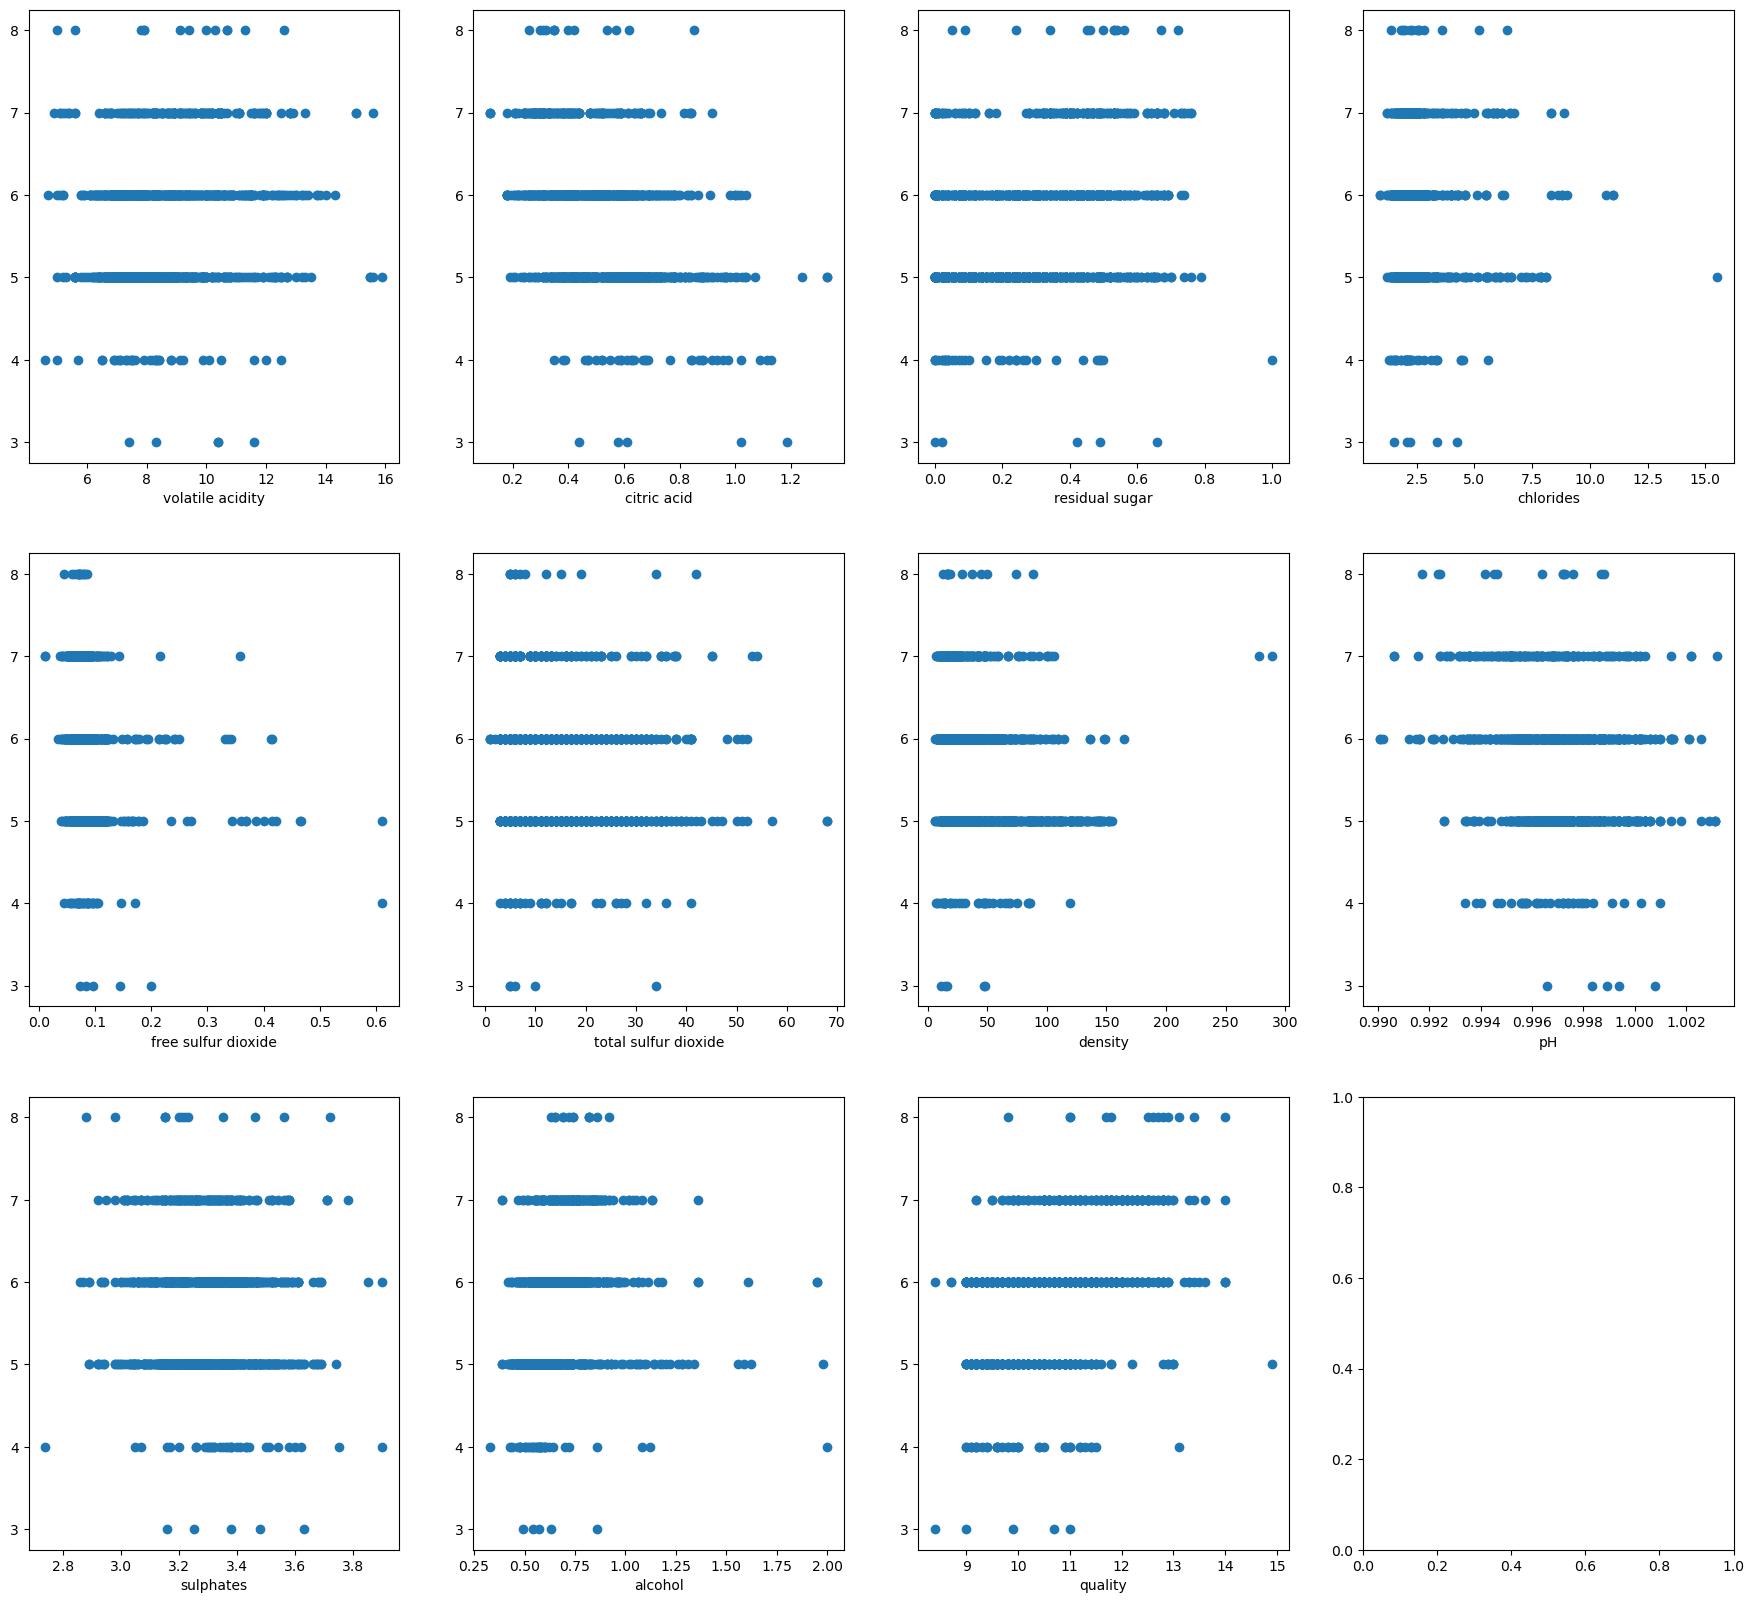

In [11]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array(y)
x = transposeMatrix(xs)

fig, ax = plt.subplots(3, 4, figsize=(22, 20))

for i in range(len(x)):
    xpoints = np.array(x[i])
    ax[int(i / 4)][i % 4].plot(xpoints, ypoints,'o')
    ax[int(i / 4)][i % 4].set_xlabel(feature_names[i+1])
plt.show()

The above model does not fit

#### Using the model: $y = \theta_0 + \theta_1x_1^2 + \theta_2x_2^2 ... + \theta_{11}x_{11}^2$

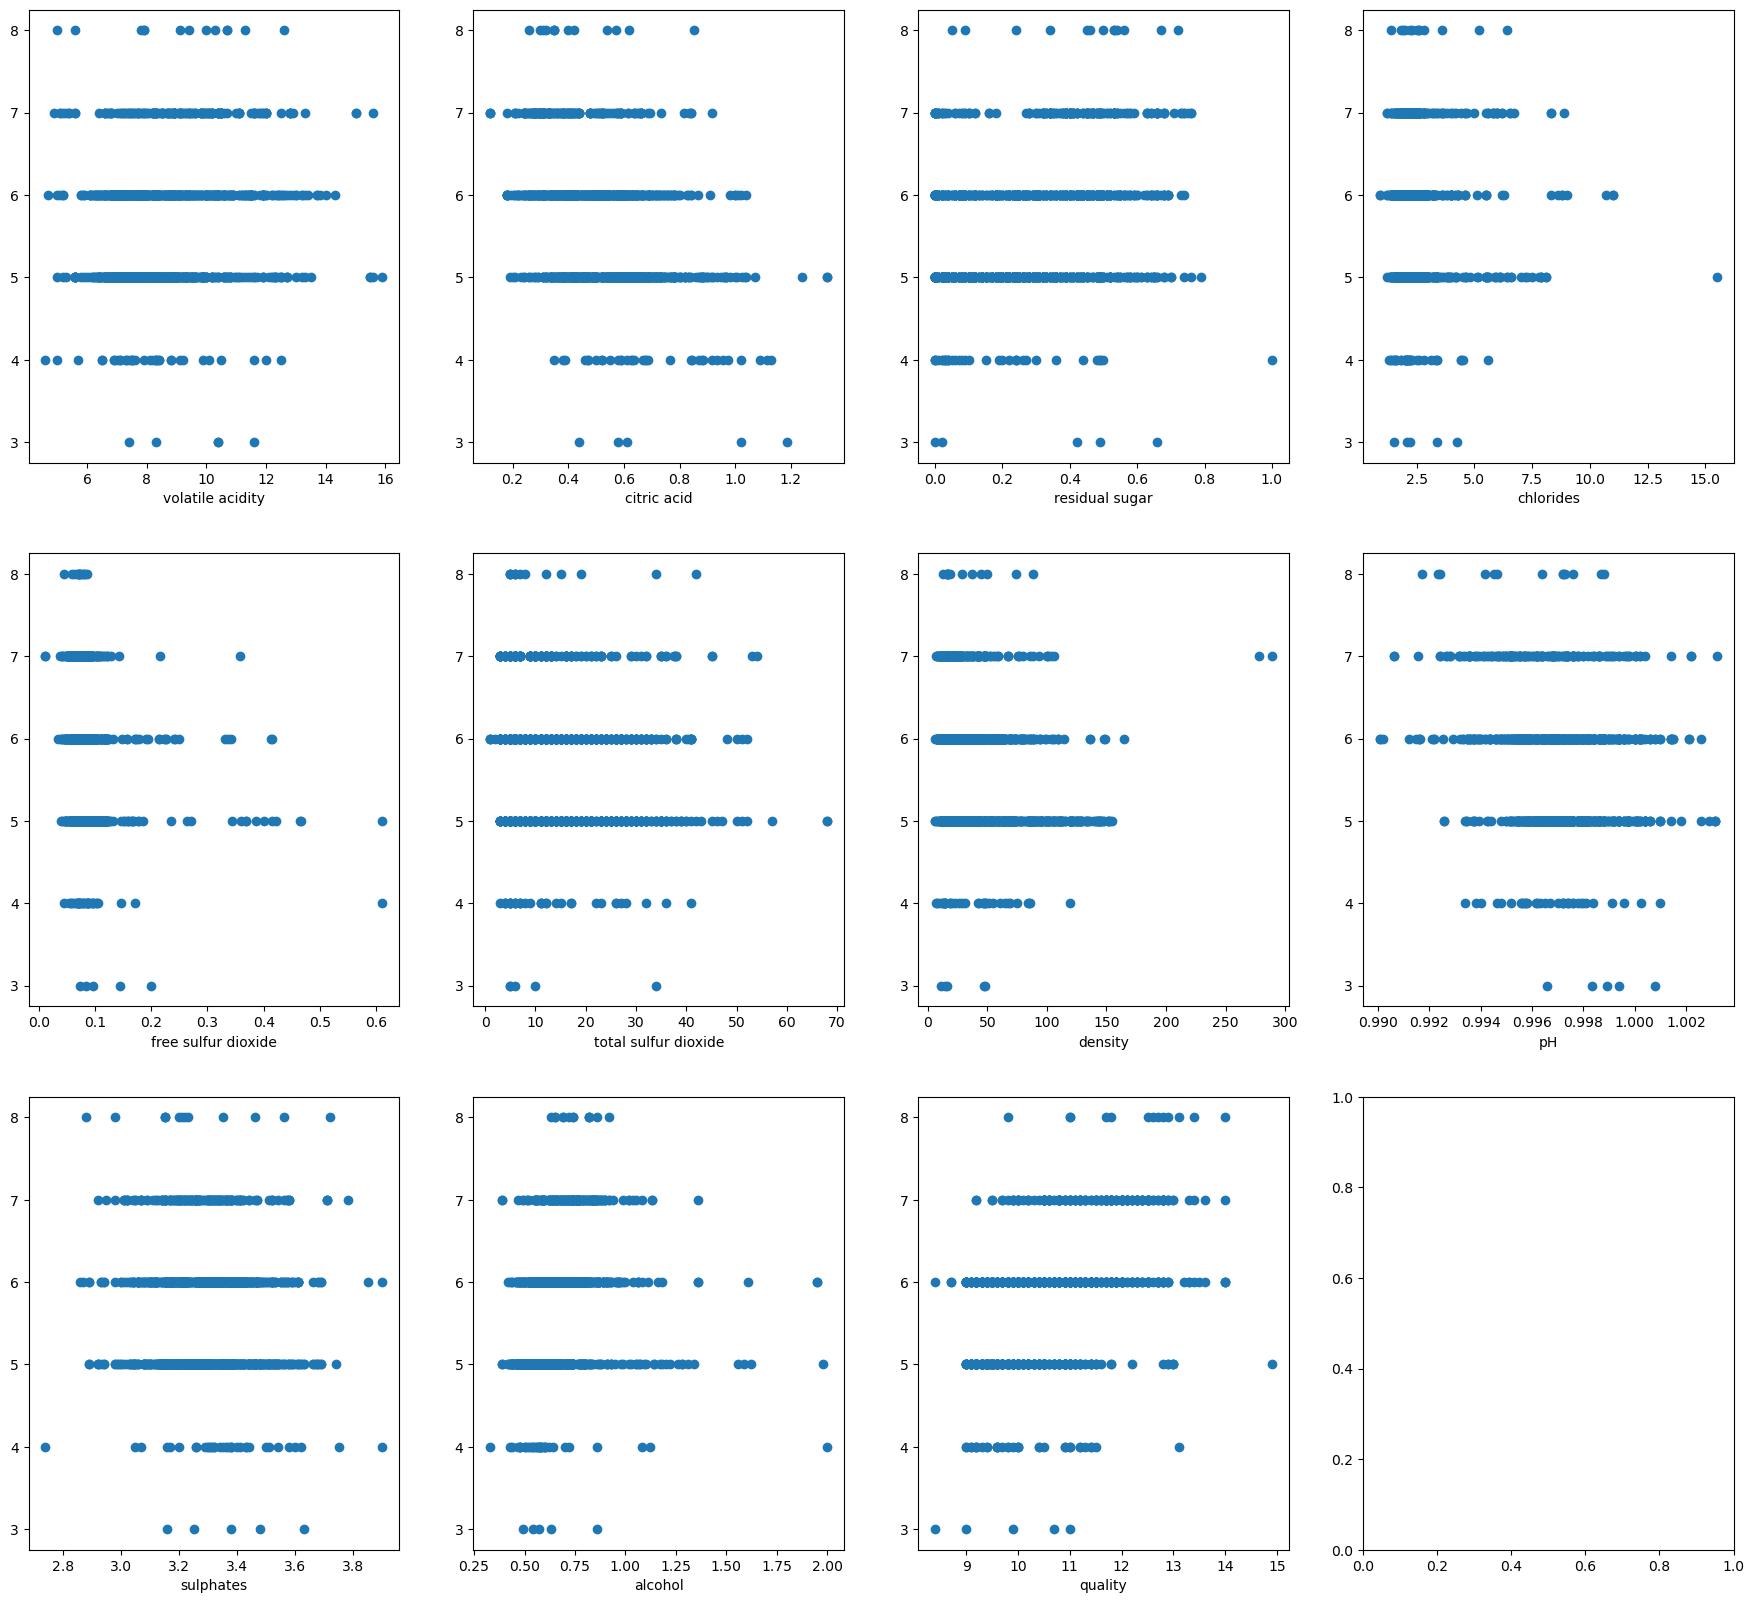

In [12]:
def model(x, theta):
    return theta[0] + theta[1]*x**2

x_pow2 = copyMatrix(x)
for i in range(len(x_pow2)):
    for j in range(len(x_pow2[i])):
        x_pow2[i][j] **= 2

fig, ax = plt.subplots(3, 4, figsize=(22, 20))

for i in range(len(x_pow2)):
    xpoints = np.array(x[i])
    ax[int(i / 4)][i % 4].plot(xpoints, ypoints,'o')
    ax[int(i / 4)][i % 4].set_xlabel(feature_names[i+1])

plt.show()

The above model does not fit too.

### Problem b

#### Using the model: $y = \theta_0 + \theta_1x$

In [13]:
xs = df.drop(columns=['quality']).values.tolist()
xs = transposeMatrix(xs)

rss_list = []

for i in range(len(xs)):
    A = getA(xs[i])
    theta = OLS(A, y)
    rss = calculateRMSE(A, theta, y)
    rss_list.append(rss)
    
print("The RSS list:")
for rss in rss_list:
    print(rss)
print()

minRSS = min(rss_list)
print("The min RSS:", minRSS)
print()

index_min_RSS = rss_list.index(minRSS)
print("The feature have min RSS:", feature_names[index_min_RSS])

The RSS list:
27.708776606551716
25.921046257502883
27.2823260960013
27.988047661119897
27.80382915794735
27.942875473161088
27.290982072665052
27.497840577708793
27.941408153675585
27.388550316050477
24.180052775014133

The min RSS: 24.180052775014133

The feature have min RSS: alcohol


**In the model "$y = \theta_0 + \theta_1x$", "alcohol" is the most suitable**

#### Using the model: $y = \theta_0 + \theta_1x^2$

In [14]:
xs = df.drop(columns=['quality']).values.tolist()
xs = transposeMatrix(xs)
for i in range(len(xs)):
    for j in range(len(xs[i])):
        xs[i][j] **= 2

rss_list = []

for i in range(len(xs)):
    A = getA(xs[i])
    theta = OLS(A, y)
    rss = calculateRMSE(A, theta, y)
    rss_list.append(rss)
    
print("The RSS list:")
for rss in rss_list:
    print(rss)
print()

minRSS = min(rss_list)
print("The min RSS:", minRSS)
print()

index_min_RSS = rss_list.index(minRSS)
print("The feature have min RSS:", feature_names[index_min_RSS])

The RSS list:
27.70963091107074
26.241761174064873
27.31268725050844
28.003970377618582
27.90374304176619
27.97826791005456
27.655463634574605
27.49925893923837
27.940382677923576
27.769753851372847
24.245065616988658

The min RSS: 24.245065616988658

The feature have min RSS: alcohol


**In Conclusion:** the feature alcohol effects the quality of wine most.

### Problem c

Visualizing dataset by Correspondace Matrix

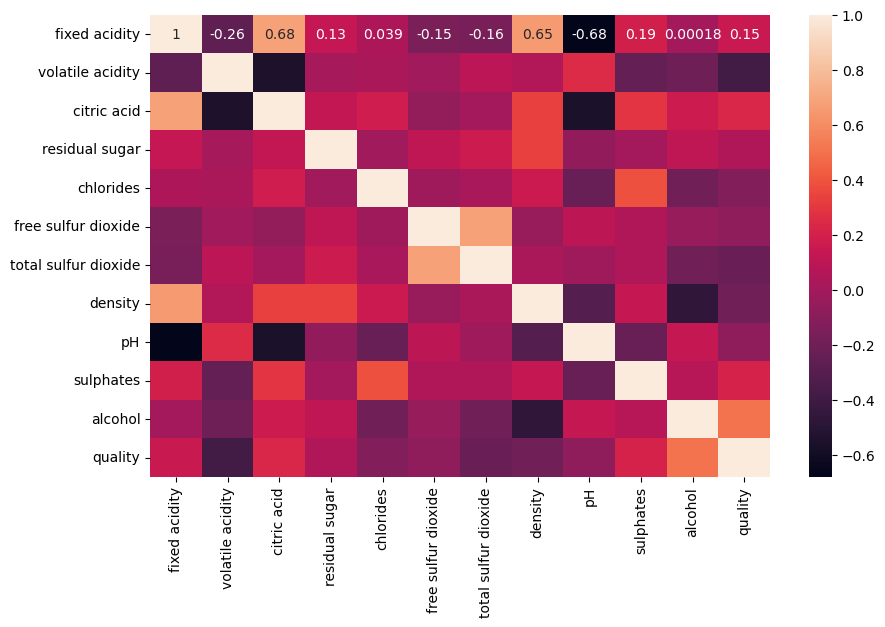

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(corr, annot=True, ax = axis)

In [16]:
X = df.drop(columns=['quality'], axis=1).values.tolist()
y = df.quality.values.tolist()
y = transposeMatrix(y)

def generateTheCorrespondanceMatrix(X):
    result = []
    
    for i in range(len(X)):
        new_features = [1]  # Start with the intercept term
        original_features = X[i]
        new_features.extend(original_features)  # Add original features
    
        # Add squared features
        for j in range(len(original_features)):
            new_features.append(original_features[j] ** 2)
    
        # Add interaction terms
        for j in range(len(original_features)):
            for k in range(j + 1, len(original_features)):
                new_features.append(original_features[j] * original_features[k])
    
        # Add interaction terms squared
        for j in range(len(original_features)):
            for k in range(j + 1, len(original_features)):
                new_features.append(original_features[j] * original_features[k] ** 2)
    
        # Update the row with the new features
        result.append(new_features)
        
    return result
    
A = generateTheCorrespondanceMatrix(X)

In [17]:
theta = OLS(A, y)

print(theta)

[[32355.405382427984], [-1850.9899226354828], [42222.30539056859], [111688.70075702184], [-1852.1780045458709], [-656280.5710183987], [-2992.989734817442], [630.4884653814872], [-65672.46460729241], [-1392.2854244512719], [-971.4492317555907], [700.2704729122], [-0.030612458643059857], [-8.849010155604459], [1.6626159719402165], [0.040935911011853225], [37.95071588708618], [-0.000735046276046307], [-4.975937522760582e-06], [33051.66053998162], [163.4860981587392], [652.298213874568], [-29.129217707400137], [-1.2015780246858203], [-0.6560323135682766], [0.023222637340365115], [-2.95421185327396], [-0.009321528539834426], [0.002822112351282381], [3715.0346754818856], [-1.1819111940629519], [-0.04620870830332269], [-0.009186191813729927], [0.8863499394185688], [-0.07879293281577637], [31.38102219881217], [0.0092520803066262], [0.014891122910150986], [-84549.19172321066], [-21.628555539127966], [-7.803606466577191], [0.11410144001034794], [0.12958427800041794], [21.036057426861635], [-0.06

In [18]:
RSS = calculateRMSE(A, theta, y)
print('RSS: ', RSS)

RSS:  19.136520311992278
